<a href="https://colab.research.google.com/github/AhmedHamedAttia/MonkeyPoxOptimizer/blob/main/MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

solution 2


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

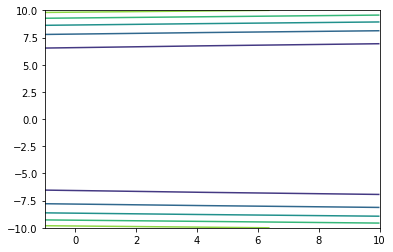

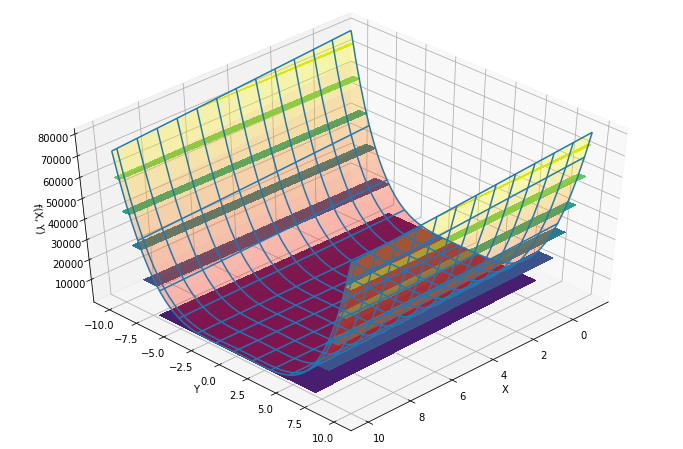

In [ ]:
#% Please forward any comments or bug reports in chat
#Copyright 2021. INDUSMIC PRIVATE LIMITED.THERE IS NO WARRANTY, EXPRESS OR IMPLIED. WE DO NOT ASSUME ANY LIABILITY FOR THE USE OF THIS PROGRAM. If software is modified to produce derivative works, such modified software should be clearly marked. Additionally, user can redistribute it and/or modify it under the terms of the GNU General Public License. This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY. See the GNU General Public License for more details.
#% for any support connect with us on help.indusmic@gmail.com
#% Author: Ayushi Manish Shukla

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
def f(x1, x2): return ((x1-1)**2) + (2*(2*x2**2-x1)**2)
x1 = np.linspace(-1, 10)
x2 = np.linspace(-10, 10)
X1, X2 = np.meshgrid(x1, x2)
F = f(x1,x2)
plt.contour(X1, X2, f(X1,X2))
def plotter(E,A):
  fig = plt.figure(figsize=[12,8])
  ax = plt.axes(projection='3d')
  ax.plot_surface(X1, X2, f(X1, X2), cmap='autumn', alpha=0.3)
  ax.plot_wireframe(X1,X2,f(X1,X2),rcount=15,ccount=15)
  ax.view_init(elev=E, azim=A)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('f(X, Y)')
  ax.contourf(x1, x2, f(X1, X2))
print("solution 2")
plotter(45,45)
from ipywidgets import interactive
iplot = interactive(plotter, E = (-90 , 90 ,5),
                             A = (-90 , 90 ,5))
iplot


In [ ]:
A = np.array([1,2,3,4,5])
A.resize(8)
A

array([1, 2, 3, 4, 5, 0, 0, 0])

In [ ]:
import numpy as np
import Monkeybox
import random
import pandas as pd

""" Problem to solve 
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4
    where (x1,x2,x3,x4)=(4,-2,3.5,5)
    
    What are the best values for the 4 weights w1 to w4?
    We are going to use the Monkeybox algorithm for the best possible values 
    after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5]

# Number of the weights we are looking to optimize.
num_weights = 4

"""
############### MO exploration step ###################
"""
cell = np.random.uniform(low=-4.0, high=4.0, size= num_weights)
##print("cell :: ",cell)
CFitness = Monkeybox.cal_fitness(equation_inputs, cell)
##print("cell fitness :: ",CFitness)
    
while 1 :
    m = np.random.uniform(low=-4.0, high=4.0, size= num_weights)
    Attack = (m + cell)/2
    AtFitness=Monkeybox.cal_fitness(equation_inputs, Attack)
    ##print("Attack :: ",Attack,"  F :: ",AtFitness)
    if AtFitness > CFitness : 
        break;


########testing function
m = Attack
#print("\n m ::",m," F m :",Monkeybox.cal_fitness(equation_inputs,m))
#print("\n copy m ::",Monkeybox.copy_gen(m)," F cm :",Monkeybox.cal_fitness(equation_inputs,Monkeybox.copy_gen(m)))
#print("\n cross over :: ",Monkeybox.crossOver(m,cell),  
#      Monkeybox.cal_fitnessArr(equation_inputs, Monkeybox.crossOver(m,cell)))

"""
########## MO Exploitation step  #######################
"""
maxGen = 1000
limpop = 2000   ### num of virus
pop = np.zeros((limpop,num_weights))
pop2 = np.arange(0.0, num_weights+1, 1)
x = np.arange(0, num_weights+1, 1)
#print(Attack)

for k in range(num_weights):
  pop2[k] = Attack[k]
pop2[num_weights] = Monkeybox.cal_fitness(equation_inputs,pop2[0:num_weights]) 
#pop2.resize(num_weights+1)
#print(pop2)
ser = pd.Series(data=pop2,index=x)
#ser[num_weight] = Monkeybox.cal_fitnessArr(equation_inputs,pop[0])
#print(ser)
df = pd.DataFrame()
#df = ser.to_frame()
df = pd.DataFrame([],columns = x)
df = df.append(ser,ignore_index=True)
#print(df.iloc[0,:])

popInd = 1
delPre = 20
BestPre =  25


for i in range(1000):
    delInd = int(np.floor(len(df)*delPre/100))
    if delInd>10:
      df = df.drop(df.tail(delInd).index)
    BestLen = int(np.ceil(len(df)*BestPre/100))
    otherLen = len(df) - BestLen
    df = df.sort_values(num_weights,ascending=False)
    df.reset_index(inplace = True)
    del df["index"]
    #print(" BLen",BestLen,"   OLen",otherLen)
    
          
    ####### copy best 
    for j in range(BestLen):
        #print(" BLen",BestLen)
        copym = Monkeybox.copy_gen(df.iloc[j,0:num_weights])
        if not((copym == df.iloc[j,0:num_weights]).all().any()):
          for k in range(num_weights):
            pop2[k] = copym[k]
          pop2[num_weights] = Monkeybox.cal_fitness(equation_inputs,pop2[0:num_weights]) 
          ser = pd.Series(data=pop2,index=x)
          df = df.append(ser,ignore_index=True)

    ###### crossOver other 
    ind = []
    for j in range(BestLen+1,BestLen+otherLen) :
        rindx = random.randint(0,BestLen-1)
        #print(df.iloc[j,0:num_weights])
        #print(df.iloc[rindx,0:num_weights])
        crossm = Monkeybox.crossOver(df.iloc[j,0:num_weights],df.iloc[rindx,0:num_weights],equation_inputs)
        if not((crossm == df.iloc[j,0:num_weights]).all().any()):
          for k in range(num_weights):
           pop2[k] = crossm[k]
          pop2[num_weights] = Monkeybox.cal_fitness(equation_inputs,pop2[0:num_weights]) 
          ser = pd.Series(data=pop2,index=x)
          if not((df == ser).all(1).any()):
            df.iloc[j,:] = ser
          
# Then return the index of that solution corresponding to the best fitness.
df = df.sort_values(num_weights,ascending=False)
df.reset_index(inplace = True)
del df["index"]

print("Best solution : \n", df.head(20))

KeyError: ignored

In [ ]:
x = [1,2,3,4]

In [ ]:
#UNTESTED
def dixonprice(x):
    return (x[0]-1)**2 + sum((i+1)*(2*x[i]**2-x[i-1])**2 for i in range(1, len(x)))

In [ ]:
dixonprice(x)

4230

In [ ]:
df.head()

,0,1,2,3,4
81,2.444665,3.676894,3.913324,3.871581,35.479410
90,3.913324,2.520998,1.319430,3.871581,34.587209
0,2.652358,0.127547,1.319430,3.871581,34.330246
85,3.713113,1.703548,2.520998,2.652358,33.530637
84,3.913324,2.520998,2.520998,2.652358,32.696580


In [ ]:
df = df.drop(81)


In [ ]:
df.head()

,0,1,2,3,4
90,3.913324,2.520998,1.319430,3.871581,34.587209
0,2.652358,0.127547,1.319430,3.871581,34.330246
85,3.713113,1.703548,2.520998,2.652358,33.530637
84,3.913324,2.520998,2.520998,2.652358,32.696580
1,2.652358,0.127547,2.520998,2.652358,32.439617


In [ ]:
range(BestLen,BestLen+otherLen) 

range(5, 19)

In [ ]:
###### crossOver other 
    for j in range(BestLen,BestLen+otherLen) :
        #print(j)
        rindx = random.randint(0,BestLen-1)
        #print("\n crossover se1 :",j," seq2 :",rindx,"   ",BestLen-1)
        crossm = Monkeybox.crossOver(df.iloc[j,0:num_weights],df.iloc[rindx,0:num_weights],equation_inputs)
        print(len(crossm))
        #df = df.drop(j)
        for k in range(num_weights):
          pop2[k] = crossm[k]
        pop2[num_weights] = Monkeybox.cal_fitness(equation_inputs,pop2[0:num_weights]) 
        #pop2.resize(num_weights+1)
        #print(pop2)
        ser = pd.Series(data=pop2,index=x)
        df = df.append(ser,ignore_index=True)

In [ ]:
df.head()

,0,1,2,3,4
90,3.913324,2.520998,1.319430,3.871581,34.587209
0,2.652358,0.127547,1.319430,3.871581,34.330246
85,3.713113,1.703548,2.520998,2.652358,33.530637
84,3.913324,2.520998,2.520998,2.652358,32.696580
1,2.652358,0.127547,2.520998,2.652358,32.439617


In [ ]:
if not((df.iloc[2,0:num_weights] == df.iloc[3,0:num_weights]).all().any()):
  print("true")

In [ ]:
df.iloc[3,0:num_weights]

0    3.913324
1    2.520998
2    2.520998
3    2.652358
Name: 84, dtype: float64

In [ ]:
crossm = Monkeybox.crossOver(df.iloc[2,0:num_weights],df.iloc[10,0:num_weights],equation_inputs)
crossm

array([3.75225244, 0.70341541, 0.76817844, 1.72219719])

In [ ]:
(df == df.iloc[2,0:num_weights+1]).all(1).any()

True

In [ ]:
rindx = random.randint(0,BestLen-1)
rindx

67

In [ ]:
df.head()

,0,1,2,3,4
0,3.610858,0.656871,0.656871,2.730385,29.080662
1,3.610858,0.656871,0.656871,2.730385,29.080662
2,3.610858,0.656871,0.656871,2.730385,29.080662
3,3.610858,0.656871,0.656871,2.730385,29.080662
4,3.610858,0.656871,0.656871,2.730385,29.080662


In [ ]:
df.drop(4)

,0,1,2,3,4
0,-0.196859,-0.131400,2.999957,2.790031,23.925370
1,-1.885288,-0.131400,2.999957,2.790031,17.171654
2,-0.588786,-0.196859,-0.131400,2.999957,12.578455
3,2.790031,-1.377715,-1.243331,-1.688444,1.121675
5,-0.131400,2.999957,2.790031,-1.377715,-3.648982
6,2.999957,2.790031,-1.377715,-1.243331,-4.618893
7,0.803504,-1.377715,-1.243331,-1.688444,-6.824433
8,1.867737,2.790031,-1.377715,-1.243331,-9.147772
9,0.129227,-1.377715,-1.243331,-1.688444,-9.521540
10,1.642905,2.790031,-1.377715,-1.243331,-10.047100


In [ ]:
df.set_index(4)

,0,1,2,3
4,,,,
5.872927,0.359042,2.615905,-0.413706,2.223308
-6.316527,-3.171395,0.359042,2.615905,-0.413706
16.596519,2.556867,0.359042,2.615905,-0.413706
20.164229,3.448794,0.359042,2.615905,-0.413706
3.963613,-0.601360,0.359042,2.615905,-0.413706
12.095726,1.431668,0.359042,2.615905,-0.413706
11.136569,-2.385598,-3.171395,0.359042,2.615905
-2.178453,-2.136876,0.359042,2.615905,-0.413706
4.988643,-3.922579,-3.171395,0.359042,2.615905


In [ ]:
df = df.sort_index()

In [ ]:
df.head()

,0,1,2,3,4
0,0.359042,2.615905,-0.413706,2.223308,5.872927
1,-3.171395,0.359042,2.615905,-0.413706,-6.316527
2,2.556867,0.359042,2.615905,-0.413706,16.596519
3,3.448794,0.359042,2.615905,-0.413706,20.164229
4,-0.601360,0.359042,2.615905,-0.413706,3.963613


,0,1,2,3,4
20,3.118650,-3.171395,0.359042,2.615905,33.153559
23,3.991819,-0.601360,0.359042,2.615905,31.506165
13,1.968373,-3.171395,0.359042,2.615905,28.552450
21,3.860851,2.556867,0.359042,2.615905,24.665840
17,3.642099,2.556867,0.359042,2.615905,23.790833
3,3.448794,0.359042,2.615905,-0.413706,20.164229
18,3.027982,3.448794,0.359042,2.615905,19.550510
10,-0.394349,-3.171395,0.359042,2.615905,19.101566
9,2.617235,0.359042,2.615905,-0.413706,16.837994
2,2.556867,0.359042,2.615905,-0.413706,16.596519


In [ ]:
df.reset_index()

,index,0,1,2,3
0,0,-1.111963,0.33938,-0.564595,-0.241974


In [ ]:
len(df)

1

In [ ]:
A = np.array([1,2,3,4])

In [ ]:
df.head()

In [ ]:
import numpy as np
import Monkeybox
import random
import pandas as pd

# Function Type 
################# dixonprice 
functype = 1
# Number of the weights we are looking to optimize.
num_weights = 75    ## or d 
UpperLim = 10
LomerLim = -10 


maxGen = 50
limpop = 100   ### num of virus
delPre = 20
BestPre =  25


"""
############### MO exploration step ###################
"""
cell = np.random.uniform(low=LomerLim, high=UpperLim, size= num_weights)
CFitness = Monkeybox.cal_fitness(functype, cell)
print("CFitness ",CFitness)
c = 0  
   
#while 1 :
#    m = np.random.uniform(low=LomerLim, high=UpperLim, size= num_weights)
#    Attack = (m + cell)/2
#    AtFitness=Monkeybox.cal_fitness(functype, Attack)
#    #print("Attack :: ",Attack)
#    print(c," Attack  F :: ",AtFitness)
#    c = c + 1
#    if AtFitness > CFitness : 
#        break;
#m = Attack
Attack = cell 

while 1 :
    Attack = Attack + 0.1
    AtFitness=Monkeybox.cal_fitness(functype, Attack)
    #print("Attack :: ",Attack)
    print(c," Attack  F :: ",AtFitness)
    c = c + 1
    if AtFitness > CFitness : 
        break;


m = cell
########testing function

"""
########## MO Exploitation step  #######################
"""
pop2 = np.arange(0.0, num_weights+1, 1)
x = np.arange(0, num_weights+1, 1)
print(Attack)

for k in range(num_weights):
  pop2[k] = Attack[k]
  
pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
pop2.resize(num_weights+1)
#print("pop2  ",pop2)
ser = pd.Series(data=pop2,index=x)
#ser[num_weight] = Monkeybox.cal_fitnessArr(equation_inputs,pop[0])
#print(" ser  ",ser)
df = pd.DataFrame()
df = ser.to_frame()
df = pd.DataFrame([],columns = x)
df = df.append(ser,ignore_index=True)
#print(" df ",df.iloc[0,:])

popInd = 1

for i in range(maxGen):
    
    df = df.sort_values(num_weights,ascending=False)
    
    delInd = int(np.floor(len(df)*delPre/100))
    if delInd>10:
      df = df.drop(df.tail(delInd).index)
    BestLen = int(np.ceil(len(df)*BestPre/100))
    otherLen = len(df) - BestLen
   
    df.reset_index(inplace = True)
    del df["index"]
    print("\n   ",i,"   ",df,"\n")
    print(" BLen",BestLen,"   OLen",otherLen)
    
          
    ####### copy best 
    for j in range(BestLen):
        #print(" BLen",BestLen)
        copym = Monkeybox.copy_gen(df.iloc[j,0:num_weights],functype)
        #print("\n *** ",copym)
        if not((copym == df.iloc[j,0:num_weights]).all().any()):
          for k in range(num_weights):
            pop2[k] = copym[k]
          pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
          ser = pd.Series(data=pop2,index=x)
          df = df.append(ser,ignore_index=True)
#
#    ###### crossOver other 
    ind = []
    for j in range(BestLen+1,BestLen+otherLen) :
        rindx = random.randint(0,BestLen-1)
        #print(df.iloc[j,0:num_weights])
        #print(df.iloc[rindx,0:num_weights])
        crossm = Monkeybox.crossOver(df.iloc[j,0:num_weights],df.iloc[rindx,0:num_weights],functype)
        if not((crossm == df.iloc[j,0:num_weights]).all().any()):
          for k in range(num_weights):
           pop2[k] = crossm[k]
          pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
          ser = pd.Series(data=pop2,index=x)
          if not((df == ser).all(1).any()):
            df.iloc[j,:] = ser
          
# Then return the index of that solution corresponding to the best fitness.
df = df.sort_values(num_weights,ascending=False)
df.reset_index(inplace = True)
del df["index"]

print("Best solution : \n", df.head(20))

Streaming output truncated to the last 5000 lines.
0  -5.932475  9.713391  9.873837 -9.873359  9.938902 -9.938883 -9.753977   
1  -5.932475  9.713391  9.873837 -9.873359  9.938902 -9.938883 -9.753977   
2  -9.809135 -6.687908 -8.925939 -8.656799 -9.938364 -9.938883 -9.753977   
3  -5.932475  9.713391 -8.925939 -9.873359  9.938902 -9.938883 -9.753977   
4  -9.148645 -9.958454 -8.925939 -9.931181 -9.936951 -9.938883 -9.869386   
5  -7.364477  9.713391 -8.925939 -9.873359  9.938902 -9.938883 -9.753977   
6  -5.932475  9.713391 -8.925939 -9.873359  9.938902 -9.938883 -9.753977   
7  -5.932475 -9.637710 -8.925939 -9.873359  9.938902 -9.938883 -9.753977   
8  -5.932475 -9.582592 -8.925939 -9.873359  9.938902 -9.938883 -9.753977   
9  -9.809135 -6.687908 -8.925939 -8.656799 -9.938364 -9.938883 -9.753977   
10 -9.148645 -9.958454 -9.457664 -9.931181  9.938902 -9.938883 -9.869386   
11 -7.364477  9.713391 -8.925939 -9.873359  9.938902 -9.938883 -9.753977   
12 -9.809135 -6.687908 -8.925939 -8.6

In [ ]:
pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 29.0 MB/s 


In [ ]:
import numpy as np
import Monkeybox
import random
import pandas as pd
import csv
from xlsxwriter import Workbook

# Function Type 
################# dixonprice 
functype = 1
# Number of the weights we are looking to optimize.
num_weights = 175    ## or d 
UpperLim = 10
LomerLim = -10 

maxGen = 50 #50
x = np.arange(0, maxGen, 1)
results = pd.DataFrame([],columns = {'Fitness'})
serResults = pd.Series(data=[0.0],index={'Fitness'})

convCurve = pd.DataFrame([],columns = x)
serCurve = pd.Series(data=np.arange(0.0, maxGen, 1),index=x)
#BsFitness = 0.0

limpop = 100   ### num of virus
delPre = 20
BestPre =  25
maxItr = 2
count = 0
while(count<maxItr):
  print("Iteration number: ", count)

  """
  ############### MO exploration step ###################
  """
  cell = np.random.uniform(low=LomerLim, high=UpperLim, size= num_weights)
  CFitness = Monkeybox.cal_fitness(functype, cell)
  #print("CFitness ",CFitness)
  c = 0  
  
  Attack = np.zeros(num_weights) 
  Attack[0:num_weights] = cell[0:num_weights] 

  while 1 :

      for i in range(num_weights) :
          #print(Attack[i],"   ",(Attack[i] - 0.2))
          if (Attack[i] - 0.01) >  LomerLim : 
              Attack[i] = Attack[i] - 0.01

      AtFitness=Monkeybox.cal_fitness(functype, Attack)
      #print("Attack :: ",Attack)
      #print(c," Attack  F :: ",AtFitness)
      c = c + 1
      if AtFitness < CFitness : 
          break;
      if c == 10000 :
          Attack[0:num_weights] = cell[0:num_weights] 
          break;



  """
  ########## MO Exploitation step  #######################
  """
  pop2 = np.arange(0.0, num_weights+1, 1)
  x = np.arange(0, num_weights+1, 1)
  #print(Attack)

  for k in range(num_weights):
    pop2[k] = Attack[k]

  pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
  pop2.resize(num_weights+1)
  #print("pop2  ",pop2)
  ser = pd.Series(data=pop2,index=x)
  #ser[num_weight] = Monkeybox.cal_fitnessArr(equation_inputs,pop[0])
  #print(" ser  ",ser)
  df = pd.DataFrame()
  df = ser.to_frame()
  df = pd.DataFrame([],columns = x)
  df = df.append(ser,ignore_index=True)
  #print(" df ",df.iloc[0,:])

  popInd = 1

  for i in range(maxGen):
    
      df = df.sort_values(num_weights,ascending=True)

      delInd = int(np.floor(len(df)*delPre/100))
      if delInd>10:
        df = df.drop(df.tail(delInd).index)
      BestLen = int(np.ceil(len(df)*BestPre/100))
      otherLen = len(df) - BestLen

      df.reset_index(inplace = True)
      del df["index"]
      #print("\n   ",i,"   ",df,"\n")
      #print(" BLen",BestLen,"   OLen",otherLen)


        ####### copy best 
      for j in range(BestLen):
          #print(" BLen",BestLen)
          copym = Monkeybox.copy_gen(df.iloc[j,0:num_weights],functype)
          #print("\n *** ",copym)
          if not((copym == df.iloc[j,0:num_weights]).all().any()):
            for k in range(num_weights):
              pop2[k] = copym[k]
            pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
            ser = pd.Series(data=pop2,index=x)
            df = df.append(ser,ignore_index=True)
  #
  #    ###### crossOver other 
      ind = []
      for j in range(BestLen+1,BestLen+otherLen) :
          rindx = random.randint(0,BestLen-1)
          #print(df.iloc[j,0:num_weights])
          #print(df.iloc[rindx,0:num_weights])
          crossm = Monkeybox.crossOver(df.iloc[j,0:num_weights],df.iloc[rindx,0:num_weights],functype)
          #print("crossm :: ",crossm)
          if not((crossm == df.iloc[j,0:num_weights]).all().any()):
            for k in range(num_weights):
                pop2[k] = crossm[k]
            pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
            ser = pd.Series(data=pop2,index=x)
            if not((df == ser).all(1).any()):
              df.iloc[j,:] = ser
      serCurve[i] = df.iloc[0,num_weights]
  convCurve = convCurve.append(serCurve,ignore_index=True)
# Then return the index of that solution corresponding to the best fitness.
  df = df.sort_values(num_weights,ascending=True)
  df.reset_index(inplace = True)
  del df["index"]

  #print("Best solution : \n", df.head(20))
  #serCurve[i] = 
  serResults[0] = df.iloc[0,num_weights]
  print("Best value", serResults[0])
  results = results.append(serResults,ignore_index=True)
  count += 1
  
#convCurve = convCurve.iloc[convCurve.iloc[:,num_weights].idxmax(),:]
results.describe()
mx = results.idxmax()

writer =  pd.ExcelWriter('ConvCurve.xlsx', engine='xlsxwriter') #SONout.xlse
convCurve.iloc[mx,:].to_excel(writer, sheet_name='ConvCurve', index=False) # welocme -> sheet sheet_name
writer.save()

Iteration number:  0
Best value 2163.6761719132264
Iteration number:  1
Best value 2662.1510479443896


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,166,167,168,169,170,171,172,173,174,175
0,2.192750,1.144070,0.646513,0.166020,0.144437,-0.182381,0.382487,0.867164,0.837574,0.678175,...,0.148282,0.304656,0.391691,-0.042952,0.392759,0.630633,-0.269251,0.363581,-0.405628,2113.040328
1,3.735482,1.226832,0.666529,-0.277592,0.144437,-0.182381,0.382487,0.867164,0.528319,0.678175,...,0.148282,0.304656,0.610330,0.092857,0.567375,0.630633,-0.393781,0.363581,-0.397657,2297.164535
2,3.735482,1.568322,0.646513,-0.277592,0.144437,-0.182381,0.382487,0.867164,0.528319,-0.223767,...,0.148282,0.304656,-0.704385,-0.042952,0.392759,0.630633,-0.393781,0.363581,-0.405628,2313.258202
3,2.192750,1.144070,0.646513,0.166020,0.144437,-0.182381,0.382487,0.867164,0.837574,0.678175,...,0.148282,0.304656,-0.384900,-0.042952,0.668677,0.630633,0.362577,0.363581,0.411474,2320.253855
4,3.735482,1.226832,0.666529,-0.277592,0.144437,-0.182381,0.382487,0.867164,0.528319,0.678175,...,0.148282,0.304656,0.610330,0.092857,0.567375,0.630633,-0.393781,0.363581,-0.397657,2350.483214


In [ ]:
df.iloc[0,:]

0         3.410802
1         1.385950
2         0.903735
3         0.564054
4        -0.419123
          ...     
171       0.908838
172       0.600270
173       0.649281
174      -0.578515
175    3439.646428
Name: 0, Length: 176, dtype: float64

In [ ]:
df.iloc[0,num_weights]

1783.7131841191206

In [ ]:
serResults[0] = df.iloc[0,num_weights]
serResults

Fitness    1783
dtype: int64

In [ ]:
results.head()

,Fitness
0,2330.825066
1,2731.364623


In [ ]:
results.describe()

,Fitness
count,50.000000
mean,2319.030560
std,463.138623
min,1360.012452
25%,2004.860361
50%,2304.076843
75%,2590.991449
max,3439.646428


In [ ]:
results.idxmax()

Fitness    49
dtype: int64

In [ ]:
results.iloc[49]

Fitness    3439.646428
Name: 49, dtype: float64

In [ ]:
np.arange(0, num_weights, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74])

In [ ]:
import numpy as np
import Monkeybox
import random
import pandas as pd
import csv
from xlsxwriter import Workbook

# Function Type 
################# dixonprice 
functype = 5
# Number of the weights we are looking to optimize.
num_weights = 175    ## or d 

if  functype == 1 or functype == 2 :
        UpperLim = 10
        LomerLim = -10
elif  functype == 3 or functype == 4 :
        UpperLim = 5.12
        LomerLim = -5.12
elif  functype == 5 :
        UpperLim = 1
        LomerLim = -1


maxGen = 50 #50
maxItr = 50

x = np.arange(0, maxGen, 1)
results = pd.DataFrame([],columns = {'Fitness'})
serResults = pd.Series(data=[0.0],index={'Fitness'})

convCurve = pd.DataFrame([],columns = x)
serCurve = pd.Series(data=np.arange(0.0, maxGen, 1),index=x)
#BsFitness = 0.0
x = np.arange(0, num_weights+1, 1)
bestVec = pd.DataFrame([],columns=x)


limpop = 100   ### num of virus
delPre = 20
BestPre =  1

count = 0
while(count<maxItr):
  print("Iteration number: ", count)

  """
  ############### MO exploration step ###################
  """
  cell = np.random.uniform(low=LomerLim, high=UpperLim, size= num_weights)
  CFitness = Monkeybox.cal_fitness(functype, cell)
  #print("CFitness ",CFitness)
  c = 0  
  
  Attack = np.zeros(num_weights) 
  Attack[0:num_weights] = cell[0:num_weights] 

  while 1 :

      for i in range(num_weights) :
          #print(Attack[i],"   ",(Attack[i] - 0.2))
          if (Attack[i] - 0.01) >  LomerLim : 
              Attack[i] = Attack[i] - 0.01

      AtFitness=Monkeybox.cal_fitness(functype, Attack)
      #print("Attack :: ",Attack)
      #print(c," Attack  F :: ",AtFitness)
      c = c + 1
      if AtFitness < CFitness : 
          break;
      if c == 10000 :
          Attack[0:num_weights] = cell[0:num_weights] 
          break;



  """
  ########## MO Exploitation step  #######################
  """
  pop2 = np.arange(0.0, num_weights+1, 1)
  x = np.arange(0, num_weights+1, 1)
  #print(Attack)

  for k in range(num_weights):
    pop2[k] = Attack[k]

  pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
  pop2.resize(num_weights+1)
  #print("pop2  ",pop2)
  ser = pd.Series(data=pop2,index=x)
  #ser[num_weight] = Monkeybox.cal_fitnessArr(equation_inputs,pop[0])
  #print(" ser  ",ser)
  df = pd.DataFrame()
  df = ser.to_frame()
  df = pd.DataFrame([],columns = x)
  df = df.append(ser,ignore_index=True)
  #print(" df ",df.iloc[0,:])

  popInd = 1

  for i in range(maxGen):
    
      df = df.sort_values(num_weights,ascending=True)

      delInd = int(np.floor(len(df)*delPre/100))
      if delInd>10:
        df = df.drop(df.tail(delInd).index)
      BestLen = int(np.ceil(len(df)*BestPre/100))
      otherLen = len(df) - BestLen

      df.reset_index(inplace = True)
      del df["index"]
      #print("\n   ",i,"   ",df,"\n")
      #print(" BLen",BestLen,"   OLen",otherLen)


        ####### copy best 
      for j in range(BestLen):
          #print(" BLen",BestLen)
          copym = Monkeybox.copy_gen(df.iloc[j,0:num_weights],functype)
          #print("\n *** ",copym)
          if not((copym == df.iloc[j,0:num_weights]).all().any()):
            for k in range(num_weights):
              pop2[k] = copym[k]
            pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
            ser = pd.Series(data=pop2,index=x)
            df = df.append(ser,ignore_index=True)
  #
  #    ###### crossOver other 
      ind = []
      for j in range(BestLen+1,BestLen+otherLen) :
          rindx = random.randint(0,BestLen-1)
          #print(df.iloc[j,0:num_weights])
          #print(df.iloc[rindx,0:num_weights])
          crossm = Monkeybox.crossOver(df.iloc[j,0:num_weights],df.iloc[rindx,0:num_weights],functype)
          #print("crossm :: ",crossm)
          if not((crossm == df.iloc[j,0:num_weights]).all().any()):
            for k in range(num_weights):
                pop2[k] = crossm[k]
            pop2[num_weights] = Monkeybox.cal_fitness(functype,pop2[0:num_weights]) 
            ser = pd.Series(data=pop2,index=x)
            if not((df == ser).all(1).any()):
              df.iloc[j,:] = ser
      serCurve[i] = df.iloc[0,num_weights]
  convCurve = convCurve.append(serCurve,ignore_index=True)
# Then return the index of that solution corresponding to the best fitness.
  df = df.sort_values(num_weights,ascending=True)
  df.reset_index(inplace = True)
  del df["index"]

  #print("Best solution : \n", df.head(20))
  #serCurve[i] = 
  serResults[0] = df.iloc[0,num_weights]
  bestVec = bestVec.append(df.iloc[0,:],ignore_index=True)
  print("Best value", serResults[0])
  results = results.append(serResults,ignore_index=True)
  count += 1
  
#convCurve = convCurve.iloc[convCurve.iloc[:,num_weights].idxmax(),:]
results.describe()
mx = results.idxmax()

writer =  pd.ExcelWriter('ConvCurve.xlsx', engine='xlsxwriter') 
convCurve.iloc[mx,:].to_excel(writer, sheet_name='ConvCurve', index=False) 
writer.save()

Iteration number:  0
Best value 0.002482575911959905
Iteration number:  1
Best value 0.0001392924943041382
Iteration number:  2
Best value 0.002353960095796625
Iteration number:  3
Best value 7.612080378588157e-05
Iteration number:  4
Best value 0.0005917972943671441
Iteration number:  5
Best value 0.00190831983688366
Iteration number:  6
Best value 9.198611317984083e-05
Iteration number:  7
Best value 0.0007616630128857796
Iteration number:  8
Best value 0.00010446729629788621
Iteration number:  9
Best value 1.6964369538068862e-05
Iteration number:  10
Best value 0.0008148640155783425
Iteration number:  11
Best value 0.00014630788140379135
Iteration number:  12
Best value 0.00015582894638113324
Iteration number:  13
Best value 0.0002346434869222298
Iteration number:  14
Best value 6.439620218128595e-05
Iteration number:  15
Best value 0.0006568413186027152
Iteration number:  16
Best value 7.49995821082136e-05
Iteration number:  17
Best value 4.1787960400139094e-05
Iteration number:  1

In [ ]:
results.describe()

,Fitness
count,5.000000e+01
mean,5.990324e-04
std,7.578728e-04
min,5.488488e-07
25%,9.226377e-05
50%,2.495822e-04
75%,7.936444e-04
max,2.508495e-03


In [ ]:
bestVec.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1.256909,0.852224,0.679045,-0.556278,0.051293,0.571666,-0.891434,0.205306,0.424172,0.050826,...,-0.410878,-0.253011,0.100085,-0.367976,0.464750,-0.916378,0.168179,-0.034879,-0.646093,897.149142
1,3.221142,1.504232,0.930658,0.484592,0.438505,-0.291907,0.347321,0.518849,-0.485156,0.095959,...,0.098130,-0.534380,0.010183,0.026299,-0.003453,0.276358,0.505121,0.553484,-0.601860,835.742418
2,0.447086,0.540462,0.541666,0.617756,-0.351053,0.892156,0.643227,0.320862,0.093900,0.439030,...,-0.367616,0.140253,0.450144,-0.026261,0.113787,0.582850,0.638035,0.540341,-0.429028,633.499333
3,1.917329,1.025098,0.388360,0.324389,-0.591236,0.054380,0.766961,0.567983,0.377163,0.312319,...,0.995293,0.968989,0.751219,0.612273,0.510488,0.367882,0.505021,0.733445,0.618212,802.027755
4,4.319996,1.643181,1.545574,1.007529,0.639144,0.631463,0.426894,0.043840,0.604200,0.699095,...,0.250129,0.075366,-0.528779,-0.038667,0.719688,0.531970,0.481623,0.392307,-0.249251,806.767395


In [ ]:
bestVec.iloc[0,4]

0.013980157112892801

In [ ]:
y = bestVec.iloc[0,0:4]

In [ ]:
y

0   -0.013835
1   -0.012054
2   -0.004397
3   -0.014605
Name: 0, dtype: float64

In [ ]:
import numpy as np
import math
def sumpow(xx):
    d = len(xx);
    sumval = 0
    
    for ii in range(d):
         xi = xx[ii]
         new = (abs(xi))**(ii+2)
         sumval = sumval + new
     
    return sumval

In [ ]:
sumpow(y)

0.00019315208812041847